# Experimental design

Here we are exploring metabolites present in different gut sections of a triatomine insect, *Rhodnius prolixus*. 
These insects are vectors of the parasite, *Trypanosoma cruzi*, which cause Chagas disease. For this experiment, we have fed insects on blood containing either *T. cruzi*, *T. rangeli* (a non-infectious relative) or not infected at all (control samples). The parasites lifecycle involves different processes in each of the gut compartments, so we sought to investigate what metabolites are present in each of the different compartments.

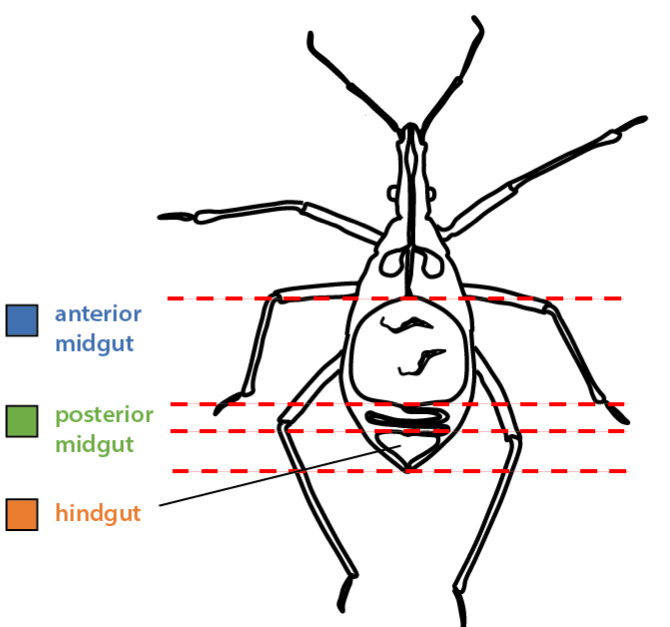

At different time points we dissected the insects, separated the gut compartments and extracted the chemical compounds. These were then analyzed by HPLC/MS<sup>2</sup> and pre-processed with:

1. [MZmine2](http://mzmine.github.io/) for pre-processing and peak picking
2. [GNPS Feature Based Molecular Networking](https://gnps.ucsd.edu/ProteoSAFe/index.jsp?params=%7B%22workflow%22:%22FEATURE-BASED-MOLECULAR-NETWORKING%22,%22library_on_server%22:%22d.speclibs;%22%7D)


# Data Cleaning
## Raw Data

In [1]:
import numpy as np
import pandas as pd
data = pd.read_csv("..data/FBMN_peaklist_200520_quant.csv").T

In [2]:
data.head(10)

,0,1,2,3,4,5,6,7,8,9,...,1426,1427,1428,1429,1430,1431,1432,1433,1434,1435
row ID,1.200000e+01,1.400000e+01,1.600000e+01,1.900000e+01,2.200000e+01,2.300000e+01,2.500000e+01,2.600000e+01,2.800000e+01,3.100000e+01,...,18911.000000,19007.000000,19127.000000,19207.000000,19454.000000,19466.000000,19548.000000,19869.000000,19994.000000,20163.000000
row m/z,4.152109e+02,4.371929e+02,4.572767e+02,3.271776e+02,5.532554e+02,1.190860e+02,6.293717e+02,4.803077e+02,5.223545e+02,7.635154e+02,...,124.967214,453.167010,443.171244,309.581772,616.175797,224.091635,725.615763,522.354360,417.025757,309.098409
row retention time,9.200066e+00,9.200345e+00,1.047197e+01,8.663874e+00,1.287312e+01,9.200257e+00,1.671557e+01,1.096287e+01,1.099696e+01,1.624835e+01,...,0.314417,9.316367,9.338894,9.070340,9.046608,2.965430,12.324333,11.067387,4.857672,9.662856
12.mzXML Peak area,3.796369e+06,5.063943e+06,1.393111e+06,1.227387e+06,1.468813e+06,2.449516e+06,8.257839e+05,1.032225e+06,7.754757e+05,3.742482e+06,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6.mzXML Peak area,2.843716e+06,3.776676e+06,1.257123e+06,1.131262e+06,1.091194e+06,1.816302e+06,5.328486e+05,3.661562e+05,5.601602e+05,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9.mzXML Peak area,2.888328e+06,3.850208e+06,1.450928e+06,1.343124e+06,1.053754e+06,1.833295e+06,5.100184e+05,1.205615e+06,1.121122e+06,4.229762e+06,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8.mzXML Peak area,2.820063e+06,3.828831e+06,1.438087e+06,1.352959e+06,8.969202e+05,1.781519e+06,5.947579e+05,7.930129e+05,7.086120e+05,3.704089e+06,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
11.mzXML Peak area,2.992731e+06,4.036865e+06,1.050344e+06,1.138327e+06,7.177229e+05,1.873296e+06,4.790120e+05,3.127069e+05,4.377292e+05,3.598801e+06,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2.mzXML Peak area,2.508920e+06,3.369614e+06,1.301654e+06,1.269396e+06,1.025660e+06,1.657597e+06,1.552197e+06,7.507438e+05,7.363733e+05,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3.mzXML Peak area,2.773745e+06,3.809219e+06,1.285428e+06,1.224331e+06,1.428464e+06,1.848230e+06,1.470544e+06,7.542625e+05,8.233654e+05,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Here we've got a table of different metabolites (columns) to our different samples. Let's clean this up and separate the peak ids.

In [3]:
data.shape

(182, 1436)

In [4]:
peak_IDs = data.T[['row ID', 'row m/z', 'row retention time']].rename(index=str,
                       columns={'row m/z': 'm/z', 'row retention time': 'retention time'})
peak_IDs.head()

,row ID,m/z,retention time
0,12.0,415.210919,9.200066
1,14.0,437.192936,9.200345
2,16.0,457.276727,10.471969
3,19.0,327.177550,8.663874
4,22.0,553.255367,12.873119


In [5]:
#put this aside for later
peak_IDs.to_csv("peak_IDs.csv", index =False)

In [6]:
data.tail()

,0,1,2,3,4,5,6,7,8,9,...,1426,1427,1428,1429,1430,1431,1432,1433,1434,1435
176.mzXML Peak area,1.398542e+07,1.406559e+07,769636.332,1.093658e+06,2.919566e+06,8494448.521,1.466197e+06,4.535283e+05,1.056837e+06,0.000000e+00,...,0.0,2.349590e+06,0.0,787483.183,0.0,0.0000,0.0,0.000000e+00,0.0000,0.0
163.mzXML Peak area,1.328403e+07,0.000000e+00,781615.172,1.062881e+06,3.692961e+06,8212969.473,2.265386e+06,1.399731e+06,0.000000e+00,0.000000e+00,...,0.0,0.000000e+00,0.0,0.000,0.0,106565.3265,0.0,1.884992e+06,0.0000,0.0
169.mzXML Peak area,1.316770e+07,0.000000e+00,895582.270,8.839245e+05,3.382876e+06,7801008.255,1.581878e+06,1.898602e+06,1.702624e+06,4.006787e+06,...,0.0,2.367411e+06,0.0,0.000,0.0,0.0000,0.0,0.000000e+00,0.0000,0.0
175.mzXML Peak area,1.373957e+07,1.374488e+07,1029259.480,1.280146e+06,2.959732e+06,8251755.241,1.311603e+06,2.059105e+06,2.107884e+06,3.824208e+06,...,0.0,0.000000e+00,0.0,0.000,0.0,678601.5795,0.0,0.000000e+00,21034.0995,0.0
Unnamed: 181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can clean up the index names and also drop the last row that doesn't contain any data.

In [7]:
data = data.drop(data.index[-1])
data.tail()

,0,1,2,3,4,5,6,7,8,9,...,1426,1427,1428,1429,1430,1431,1432,1433,1434,1435
173.mzXML Peak area,1.451710e+07,0.000000e+00,712055.766,1.069711e+06,2.920445e+06,8953482.401,1.775726e+06,8.847667e+05,1.551211e+06,0.000000e+00,...,0.0,2.435891e+06,0.0,760277.871,0.0,0.0000,0.0,0.000000e+00,0.0000,0.0
176.mzXML Peak area,1.398542e+07,1.406559e+07,769636.332,1.093658e+06,2.919566e+06,8494448.521,1.466197e+06,4.535283e+05,1.056837e+06,0.000000e+00,...,0.0,2.349590e+06,0.0,787483.183,0.0,0.0000,0.0,0.000000e+00,0.0000,0.0
163.mzXML Peak area,1.328403e+07,0.000000e+00,781615.172,1.062881e+06,3.692961e+06,8212969.473,2.265386e+06,1.399731e+06,0.000000e+00,0.000000e+00,...,0.0,0.000000e+00,0.0,0.000,0.0,106565.3265,0.0,1.884992e+06,0.0000,0.0
169.mzXML Peak area,1.316770e+07,0.000000e+00,895582.270,8.839245e+05,3.382876e+06,7801008.255,1.581878e+06,1.898602e+06,1.702624e+06,4.006787e+06,...,0.0,2.367411e+06,0.0,0.000,0.0,0.0000,0.0,0.000000e+00,0.0000,0.0
175.mzXML Peak area,1.373957e+07,1.374488e+07,1029259.480,1.280146e+06,2.959732e+06,8251755.241,1.311603e+06,2.059105e+06,2.107884e+06,3.824208e+06,...,0.0,0.000000e+00,0.0,0.000,0.0,678601.5795,0.0,0.000000e+00,21034.0995,0.0


In [8]:
#drop the peak ID rows
data = data.drop(data.index[[i for i in range(3)]])
data.head()

,0,1,2,3,4,5,6,7,8,9,...,1426,1427,1428,1429,1430,1431,1432,1433,1434,1435
12.mzXML Peak area,3.796369e+06,5.063943e+06,1.393111e+06,1.227387e+06,1.468813e+06,2.449516e+06,825783.9135,1.032225e+06,7.754757e+05,3.742482e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6.mzXML Peak area,2.843716e+06,3.776676e+06,1.257123e+06,1.131262e+06,1.091194e+06,1.816302e+06,532848.6200,3.661562e+05,5.601602e+05,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9.mzXML Peak area,2.888328e+06,3.850208e+06,1.450928e+06,1.343124e+06,1.053754e+06,1.833295e+06,510018.4095,1.205615e+06,1.121122e+06,4.229762e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8.mzXML Peak area,2.820063e+06,3.828831e+06,1.438087e+06,1.352959e+06,8.969202e+05,1.781519e+06,594757.9100,7.930129e+05,7.086120e+05,3.704089e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11.mzXML Peak area,2.992731e+06,4.036865e+06,1.050344e+06,1.138327e+06,7.177229e+05,1.873296e+06,479011.9615,3.127069e+05,4.377292e+05,3.598801e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
data.shape

(178, 1436)

In [10]:
# Clean up index names. We will import a metadata table later to match the experiment numbers 
new_index = [x[:x.find('.')] for x in data.index]
data.index = new_index
data.head()

,0,1,2,3,4,5,6,7,8,9,...,1426,1427,1428,1429,1430,1431,1432,1433,1434,1435
12,3.796369e+06,5.063943e+06,1.393111e+06,1.227387e+06,1.468813e+06,2.449516e+06,825783.9135,1.032225e+06,7.754757e+05,3.742482e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2.843716e+06,3.776676e+06,1.257123e+06,1.131262e+06,1.091194e+06,1.816302e+06,532848.6200,3.661562e+05,5.601602e+05,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2.888328e+06,3.850208e+06,1.450928e+06,1.343124e+06,1.053754e+06,1.833295e+06,510018.4095,1.205615e+06,1.121122e+06,4.229762e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2.820063e+06,3.828831e+06,1.438087e+06,1.352959e+06,8.969202e+05,1.781519e+06,594757.9100,7.930129e+05,7.086120e+05,3.704089e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,2.992731e+06,4.036865e+06,1.050344e+06,1.138327e+06,7.177229e+05,1.873296e+06,479011.9615,3.127069e+05,4.377292e+05,3.598801e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
data = data.sort_index()
data.tail()

,0,1,2,3,4,5,6,7,8,9,...,1426,1427,1428,1429,1430,1431,1432,1433,1434,1435
96,1.361943e+07,0.000000e+00,523002.1620,542645.6485,3.962324e+06,8.431116e+06,2.819975e+06,2.869711e+05,3.553950e+05,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,7.969861e+06,5.680005e+06,403744.6720,502833.9535,1.093696e+06,4.378058e+06,8.728148e+05,1.190713e+06,1.396314e+06,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,6.548367e+06,5.515941e+06,515137.2985,516988.4085,1.192216e+06,4.064118e+06,1.471412e+06,4.789295e+05,6.894363e+05,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99,9.140045e+06,6.371228e+06,496396.0585,349881.0045,1.705856e+06,5.929142e+06,1.592425e+06,8.935701e+05,7.018750e+05,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ACN,0.000000e+00,0.000000e+00,0.0000,0.0000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We have a few different types of blank. 

1. Firstly there's an acetonitrile (ACN) blank that was run through the HPLC column to detect anything that might still be present from previous experiments. We will make the assumption that these compounds are not present in our samples so we'll subtract those directly.
2. The next kind is a PBS blank, where no gut compartments were added to the PBS, the PBS was simply extracted with methanol. We have triplicates of these. 
3. The third type is an extraction blank where we simply use methanol without processing. 

We will subtract the ACN blank from all rows. We'll then average compounds from PBS and extraction blanks and subtract these.

In [12]:
#average extraction blanks
data_base = data.T

extr_sub = data_base[["85","86","87"]]
data_base["Extr_avg"] = extr_sub.mean(axis=1)

PBS_sub = data_base[["82","83","84"]]
data_base["PBS_avg"] = PBS_sub.mean(axis=1)

#subtract ACN blanks and drop ACN column
data_base[0:1438] = data_base[0:1438] - data_base.ACN.values[:, None]
data_base = data_base.drop(labels = "ACN", axis = 1)

# reset values below zero to zero
data_base = data_base.clip(lower=0)

#subtract PBS average, drop column and reset to zero
data_base[0:1437] = data_base[0:1437] - data_base.PBS_avg.values[:, None]
data_base = data_base.drop(labels = "PBS_avg", axis = 1)
data_base = data_base.clip(lower=0)

#subtract extraction blank average, drop column and reset to zero
data_base[0:1436] = data_base[0:1436] - data_base.Extr_avg.values[:, None]
data_base = data_base.drop(labels = "Extr_avg", axis = 1)
data_base = data_base.clip(lower=0)

#drop individual blank rows
data_base = data_base.drop(labels = ["82","83","84","85","86","87"], axis = 1)

data_clean = data_base.T


In [13]:
data_clean.to_csv("data_clean.csv")
data_clean

,0,1,2,3,4,5,6,7,8,9,...,1426,1427,1428,1429,1430,1431,1432,1433,1434,1435
1,0.000000,3.312179e+06,0.000000,172865.362833,0.000000,0.000000,0.0000,1.171776e+06,2.345421e+06,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.000000,4.778688e+06,487642.148167,881565.153833,0.000000,0.000000,0.0000,1.845586e+06,2.738662e+06,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100,0.000000,7.474432e+06,0.000000,0.000000,0.000000,0.000000,0.0000,1.247987e+06,1.435181e+06,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101,0.000000,7.369074e+06,0.000000,0.000000,0.000000,0.000000,0.0000,3.643449e+05,3.491248e+05,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102,0.000000,7.336385e+06,0.000000,0.000000,0.000000,0.000000,0.0000,7.175403e+05,5.038600e+05,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,670978.170333,0.000000e+00,116385.408667,0.000000,0.000000,255776.246167,691881.5510,1.231487e+06,1.306633e+06,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,665853.351333,0.000000e+00,0.000000,0.000000,346504.788667,510055.705167,654542.8845,2.869711e+05,3.553950e+05,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,0.000000,5.680005e+06,0.000000,0.000000,0.000000,0.000000,0.0000,1.190713e+06,1.396314e+06,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,0.000000,5.515941e+06,0.000000,0.000000,0.000000,0.000000,0.0000,4.789295e+05,6.894363e+05,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Metadata
Now we can add in the metadata file.

In [14]:
metadata = pd.read_csv("../metadata_all.txt", sep="\t")

In [15]:
metadata

,filename,ATTRIBUTE_Organism,ATTRIBUTE_Pool,ATTRIBUTE_Time_point,ATTRIBUTE_Gut_section,ATTRIBUTE_Con/Inf
0,1.mzXML,T.cruzi_tryp,c1,0,AM,Con
1,2.mzXML,T.cruzi_tryp,c1,0,PM,Con
2,3.mzXML,T.cruzi_tryp,c1,0,H,Con
3,4.mzXML,T.cruzi_tryp,c2,0,AM,Con
4,5.mzXML,T.cruzi_tryp,c2,0,PM,Con
...,...,...,...,...,...,...
173,173.mzXML,T.cruzi_epi,c2,4,PM,Con
174,174.mzXML,T.cruzi_epi,c2,4,H,Con
175,175.mzXML,T.cruzi_epi,c3,4,AM,Con
176,176.mzXML,T.cruzi_epi,c3,4,PM,Con


We need to do just a couple of things to clean this file up:

- Drop blank columns
- Clean column names
- Remove file name extensions

In [16]:
#drop the ACN and other blank rows since we've already processed those above
metadata = metadata.sort_index()
metadata = metadata.drop([81,82,83,84,85,86,87])

In [17]:
#clean column names
columns = {col: col.lower().replace('attribute_', '') for col in metadata.columns}
metadata = metadata.rename(columns=columns)
metadata = metadata.rename(columns={"con/inf":"infection_status"})
metadata

,filename,organism,pool,time_point,gut_section,infection_status
0,1.mzXML,T.cruzi_tryp,c1,0,AM,Con
1,2.mzXML,T.cruzi_tryp,c1,0,PM,Con
2,3.mzXML,T.cruzi_tryp,c1,0,H,Con
3,4.mzXML,T.cruzi_tryp,c2,0,AM,Con
4,5.mzXML,T.cruzi_tryp,c2,0,PM,Con
...,...,...,...,...,...,...
173,173.mzXML,T.cruzi_epi,c2,4,PM,Con
174,174.mzXML,T.cruzi_epi,c2,4,H,Con
175,175.mzXML,T.cruzi_epi,c3,4,AM,Con
176,176.mzXML,T.cruzi_epi,c3,4,PM,Con


In [18]:
index = metadata['filename'].apply(lambda x: x.replace(".mzXML", ""))
metadata.index = index
metadata.index.name = None
metadata = metadata.drop(['filename'], axis=1)
metadata

,organism,pool,time_point,gut_section,infection_status
1,T.cruzi_tryp,c1,0,AM,Con
2,T.cruzi_tryp,c1,0,PM,Con
3,T.cruzi_tryp,c1,0,H,Con
4,T.cruzi_tryp,c2,0,AM,Con
5,T.cruzi_tryp,c2,0,PM,Con
...,...,...,...,...,...
173,T.cruzi_epi,c2,4,PM,Con
174,T.cruzi_epi,c2,4,H,Con
175,T.cruzi_epi,c3,4,AM,Con
176,T.cruzi_epi,c3,4,PM,Con


We had some insects that were not fed, just dissected. The idea was that we get a baseline of what's sticking around from previous feeds. We'll replace "No_timepoint" from the starved samples as -1 in the metadata and then convert the column to "int" type.

In [19]:
metadata.time_point = metadata.time_point.replace("No_timepoint", -1)
metadata.time_point = metadata.time_point.astype(int)


In [20]:
#save data
metadata.index = metadata.index.astype(int)
metadata.to_csv('metadata_clean.csv')

## Merging metadata

In [21]:
#reload data
data_clean = pd.read_csv("data_clean.csv", index_col=0)
metadata_clean = pd.read_csv('metadata_clean.csv', index_col=0)
merged_data = data_clean.join(metadata, how='inner')

In [22]:
merged_data

,0,1,2,3,4,5,6,7,8,9,...,1431,1432,1433,1434,1435,organism,pool,time_point,gut_section,infection_status
1,0.000000,3.312179e+06,0.000000,172865.362833,0.000000,0.000000,0.0000,1.171776e+06,2.345421e+06,0.0,...,0.0,0.0,0.0,0.0,0.0,T.cruzi_tryp,c1,0,AM,Con
10,0.000000,4.778688e+06,487642.148167,881565.153833,0.000000,0.000000,0.0000,1.845586e+06,2.738662e+06,0.0,...,0.0,0.0,0.0,0.0,0.0,T.cruzi_tryp,c1,1,AM,Con
100,0.000000,7.474432e+06,0.000000,0.000000,0.000000,0.000000,0.0000,1.247987e+06,1.435181e+06,0.0,...,0.0,0.0,0.0,0.0,0.0,T.cruzi_epi,2,1,AM,Inf
101,0.000000,7.369074e+06,0.000000,0.000000,0.000000,0.000000,0.0000,3.643449e+05,3.491248e+05,0.0,...,0.0,0.0,0.0,0.0,0.0,T.cruzi_epi,2,1,PM,Inf
102,0.000000,7.336385e+06,0.000000,0.000000,0.000000,0.000000,0.0000,7.175403e+05,5.038600e+05,0.0,...,0.0,0.0,0.0,0.0,0.0,T.cruzi_epi,2,1,H,Inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,670978.170333,0.000000e+00,116385.408667,0.000000,0.000000,255776.246167,691881.5510,1.231487e+06,1.306633e+06,0.0,...,0.0,0.0,0.0,0.0,0.0,T.cruzi_epi,3,0,PM,Inf
96,665853.351333,0.000000e+00,0.000000,0.000000,346504.788667,510055.705167,654542.8845,2.869711e+05,3.553950e+05,0.0,...,0.0,0.0,0.0,0.0,0.0,T.cruzi_epi,3,0,H,Inf
97,0.000000,5.680005e+06,0.000000,0.000000,0.000000,0.000000,0.0000,1.190713e+06,1.396314e+06,0.0,...,0.0,0.0,0.0,0.0,0.0,T.cruzi_epi,1,1,AM,Inf
98,0.000000,5.515941e+06,0.000000,0.000000,0.000000,0.000000,0.0000,4.789295e+05,6.894363e+05,0.0,...,0.0,0.0,0.0,0.0,0.0,T.cruzi_epi,1,1,PM,Inf
